## [上一天 D7 常用的數值取代：中位數與分位數連續數值標準化](https://github.com/andrew623849/2nd-ML-100Days/blob/master/D07/Day_007_HW.ipynb)


# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 設定 data_path
dir_data = '../DATA/'

In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train['CNT_CHILDREN'].head(30)

Path of read in data: ../DATA/application_train.csv


0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    0
12    0
13    1
14    0
15    0
16    0
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    2
25    0
26    0
27    1
28    0
29    0
Name: CNT_CHILDREN, dtype: int64

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
#1

cut_rule = [min(app_train['CNT_CHILDREN'])-1,0,2,5,max(app_train['CNT_CHILDREN'])+1]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 20.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
#2-1

grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-1.001, 0.0]       0         166747.010980
                    1         160804.210548
(0.0, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 20.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

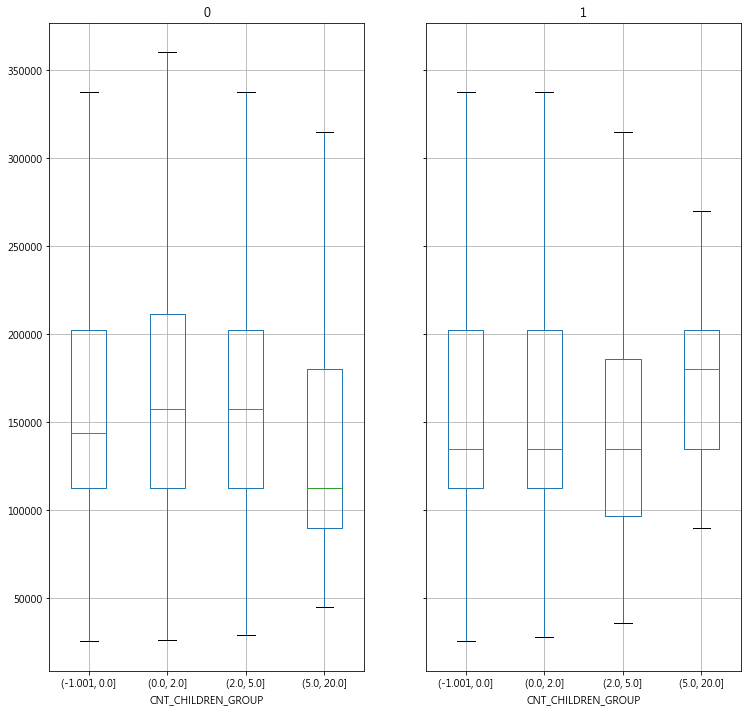

In [8]:
#2-2

plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'
app_train.groupby('TARGET').boxplot(column=plt_column,by=plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [8]:
#3
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x : (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


## [下一天 D9 EDA: correlation/相關係數簡介](https://github.com/andrew623849/2nd-ML-100Days/blob/master/D09/Day_009_HW.ipynb)
